In [4]:

import openpyxl

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("/content/Dataset_inclinacion.xlsx")


Graficas de datos

In [6]:
sheet = wb.sheet_by_index(0)
ax_f=sheet.col_values(0)
ay_f=sheet.col_values(1)
sheet = wb.sheet_by_index(1)
ax_b=sheet.col_values(0)
ay_b=sheet.col_values(1)
sheet = wb.sheet_by_index(2)
ax_r=sheet.col_values(0)
ay_r=sheet.col_values(1)
sheet = wb.sheet_by_index(3)
ax_s=sheet.col_values(0)
ay_s=sheet.col_values(1)
sheet = wb.sheet_by_index(4)
ax_l=sheet.col_values(0)
ay_l=sheet.col_values(1)

Segmentacion

In [8]:
N=10.0                      # Número de muestras
nV=np.array(np.shape(ax_f))   # Número de muestras de la señal
segment = np.floor(nV/N)    # Número de segmetos de la señal
print("Segmentos : ",segment)

Segmentos :  [5.]


Varianza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

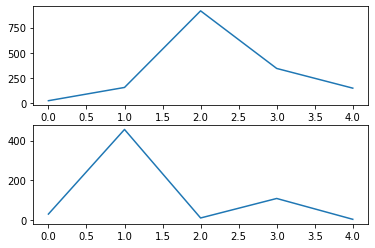

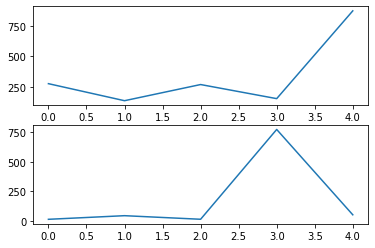

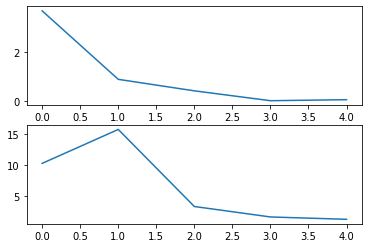

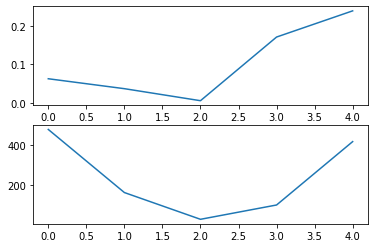

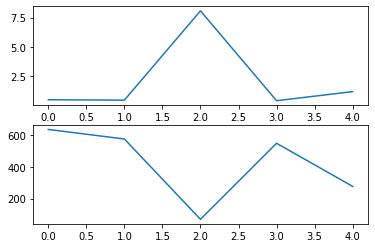

<Figure size 432x288 with 0 Axes>

In [24]:
var_ventana_ax_f=[]
var_ventana_ay_f=[]
var_ventana_ax_b=[]
var_ventana_ay_b=[]
var_ventana_ax_s=[]
var_ventana_ay_s=[]
var_ventana_ax_r=[]
var_ventana_ay_r=[]
var_ventana_ax_l=[]
var_ventana_ay_l=[]

for i in range (0,np.int(segment)):
  ventana_ax_f=ax_f[int(i*N):int((i+1)*N)]
  ventana_ay_f=ay_f[int(i*N):int((i+1)*N)]
  var_ventana_ax_f.append(np.var(ventana_ax_f))
  var_ventana_ay_f.append(np.var(ventana_ay_f))

  ventana_ax_b=ax_b[int(i*N):int((i+1)*N)]
  ventana_ay_b=ay_b[int(i*N):int((i+1)*N)]
  var_ventana_ax_b.append(np.var(ventana_ax_b))
  var_ventana_ay_b.append(np.var(ventana_ay_b))

  ventana_ax_s=ax_s[int(i*N):int((i+1)*N)]
  ventana_ay_s=ay_s[int(i*N):int((i+1)*N)]
  var_ventana_ax_s.append(np.var(ventana_ax_s))
  var_ventana_ay_s.append(np.var(ventana_ay_s))

  ventana_ax_r=ax_r[int(i*N):int((i+1)*N)]
  ventana_ay_r=ay_r[int(i*N):int((i+1)*N)]
  var_ventana_ax_r.append(np.var(ventana_ax_r))
  var_ventana_ay_r.append(np.var(ventana_ay_r))

  ventana_ax_l=ax_l[int(i*N):int((i+1)*N)]
  ventana_ay_l=ay_l[int(i*N):int((i+1)*N)]
  var_ventana_ax_l.append(np.var(ventana_ax_l))
  var_ventana_ay_l.append(np.var(ventana_ay_l))  


plt.subplot(211)
plt.plot(var_ventana_ax_f)
plt.subplot(212)
plt.plot(var_ventana_ay_f)
plt.figure()
plt.subplot(211)
plt.plot(var_ventana_ax_b)
plt.subplot(212)
plt.plot(var_ventana_ay_b)
plt.figure()
plt.subplot(211)
plt.plot(var_ventana_ax_s)
plt.subplot(212)
plt.plot(var_ventana_ay_s)
plt.figure()
plt.subplot(211)
plt.plot(var_ventana_ax_r)
plt.subplot(212)
plt.plot(var_ventana_ay_r)
plt.figure()
plt.subplot(211)
plt.plot(var_ventana_ax_l)
plt.subplot(212)
plt.plot(var_ventana_ay_l)
plt.figure()